# 1. Аналитика

In [27]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_style('darkgrid') # Задаю стиль граффического отбражения данных
sb.set_context('notebook')

q1=pd.read_csv('query_1.csv')
q3=pd.read_csv('query_3.csv')
qlast=pd.read_csv('query_last.csv')

In [28]:
q1=pd.read_csv('/datasets/query_1.csv')
q3=pd.read_csv('/datasets/query_3.csv')
qlast=pd.read_csv('/datasets/query_last.csv')

Импорт данных - успешно

In [29]:
q1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [30]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [31]:
q1=q1.sort_values(by = 'flights_amount')

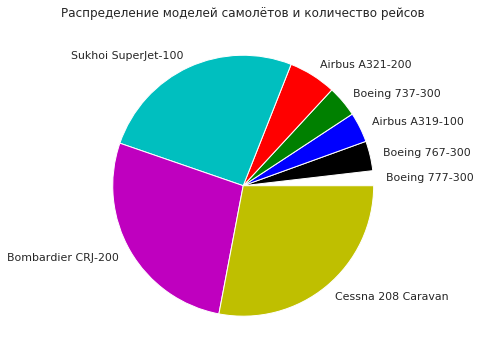

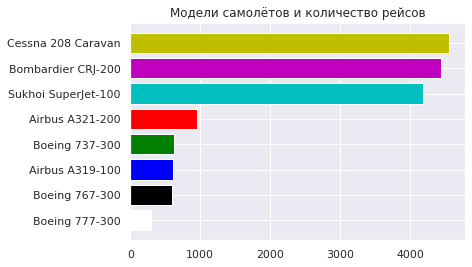

In [32]:
N=6
plt.figure(figsize=(N,N))
plt.pie(q1['flights_amount'],labels=q1['model'],colors ='wkbgrcmy')
plt.title("Распределение моделей самолётов и количество рейсов")
plt.show()
plt.barh(y=q1['model'],width=q1['flights_amount'],color ='wkbgrcmy')
plt.title( 'Модели самолётов и количество рейсов')
plt.show()

### Вывод 
* Чаще всего летает самолёт Cessna 208 Caravan. Это лёгкий одномоторный самолёт.
* Реже всего Boeing 777-300. Это широкофюзеляжный пассажирский самолёт для авиалиний большой протяжённости.
- Местные маленьние самолёты летают чаще регулярных рейсов(возможно за счёт их количества или мобильности но этот вопрос не стоит изучать в рамках этого проекта). 

In [33]:
q33=q3.sort_values(by='average_flights').tail(10)
q33

,city,average_flights
84,Ульяновск,9.580645
74,Сочи,9.612903
10,Брянск,10.000000
63,Пермь,10.129032
67,Ростов-на-Дону,10.193548
20,Екатеринбург,11.322581
33,Красноярск,11.580645
54,Новосибирск,17.322581
70,Санкт-Петербург,31.161290
43,Москва,129.774194


In [34]:
q33.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 84 to 43
Data columns (total 2 columns):
city               10 non-null object
average_flights    10 non-null float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


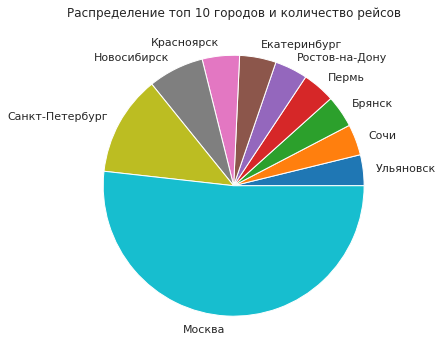

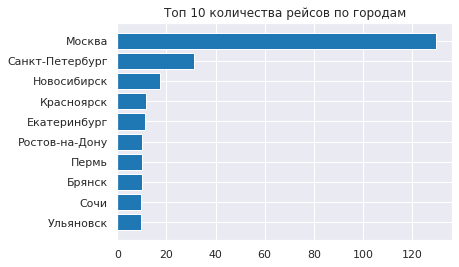

In [35]:
N=6
plt.figure(figsize=(N,N))
plt.pie(q33['average_flights'],labels=q33['city'] )
plt.title("Распределение топ 10 городов и количество рейсов")
plt.show()
plt.barh(y=q33['city'],width=q33['average_flights'])
plt.title( 'Топ 10 количества рейсов по городам')
plt.show()

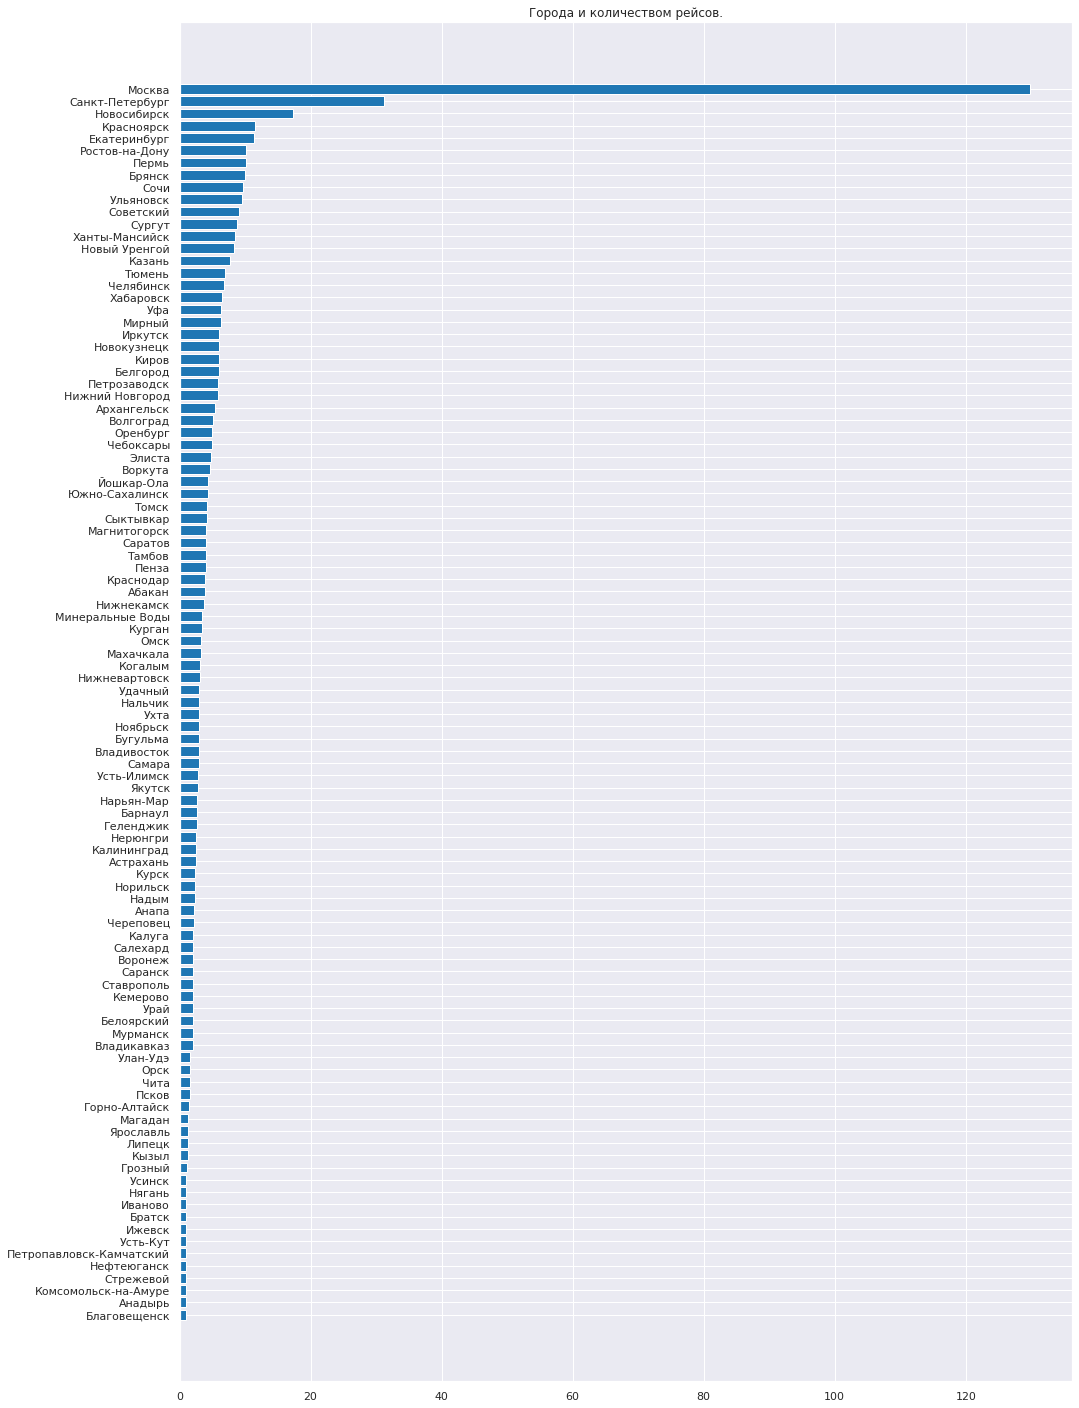

In [36]:
plt.figure(figsize=(16,25))
plt.barh(y=qq3.loc[:,'city'],width=qq3.loc[:,'average_flights'])
plt.title( 'Города и количеством рейсов.')
plt.show()

###  Вывод
* Москва лидирует по количеству рейсов. На неё приходится более 50% рейсов.

# 2. Проверка гипотезы
**"Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время"**

In [37]:
qlast.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


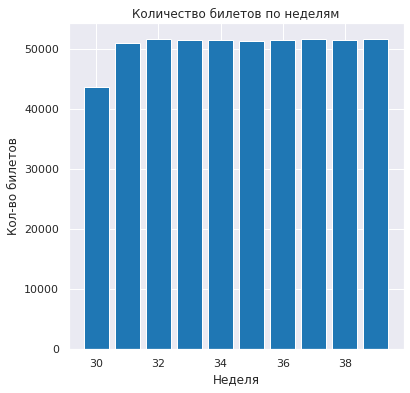

In [38]:
plt.figure(figsize=(N,N))
#plt.plot(qlast['week_number'],qlast['ticket_amount'])
plt.bar(qlast['week_number'],qlast['ticket_amount'])
plt.title( 'Количество билетов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Кол-во билетов')

plt.show()

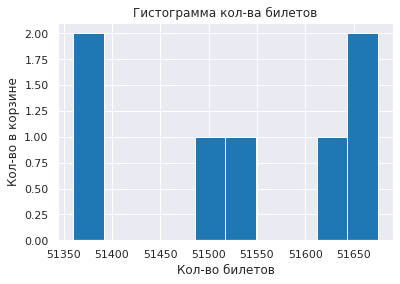

In [39]:
df= qlast.drop(index=[0,1,6])
df = df.loc[:,['week_number','ticket_amount']]
df['ticket_amount'].hist()
plt.title('Гистограмма кол-ва билетов')
plt.xlabel('Кол-во билетов')
plt.ylabel('Кол-во в корзине')
plt.show()


Очень мало данных, но будем считать что величина "Количество проданых билетов" распределена нормально для того чтобы провести т-тест стьюдента.

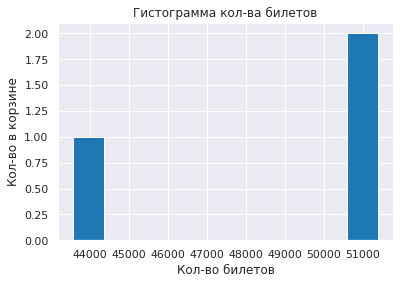

,index,week_number,ticket_amount,festival_week,festival_name
0,0,30,43568,30.0,Park Live
1,1,31,51034,31.0,Пикник Афиши
2,6,36,51386,36.0,Видфест


In [40]:
df_festival = qlast.iloc[[0,1,6],:]
df_festival = df_festival.reset_index()
df_festival['ticket_amount'].hist()
plt.title('Гистограмма кол-ва билетов')
plt.xlabel('Кол-во билетов')
plt.ylabel('Кол-во в корзине')
plt.show()
df_festival

#### Нулевая гипотеза 
* Н_0: Средний спрос на билеты во время фестиваля(одного) не отличается(равен) от среднего спроса на билеты в обычное время.

#### Альтернативная гипотеза 
* Н_1: Средний спрос на билеты во время фестивалей  отличается от среднего спроса на билеты в обычное время.

Обоснование применения t-теста.
1. Мы исследуем количественные данные.
2. Будем считать что данные распределены нормально.
3. Сами данные независимы.

In [41]:
df['ticket_amount'].describe()

count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64

In [42]:
df_festival['ticket_amount'].describe()

count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64

#### Нулевая гипотеза 
* Н_0: Средний спрос на билеты во время фестивалей не отличается(равен) от среднего спроса на билеты в обычное время.

#### Альтернативная гипотеза 
* Н_1: Средний спрос на билеты во время фестивалей  отличается от среднего спроса на билеты в обычное время.

In [51]:
print('Дисперисии кол-ва билетов для фестивалей и в обычное время соотвественно равны:',df_festival['ticket_amount'].std(),'и',df['ticket_amount'].std())
print('Дисперсии отличаются в',
      int(df_festival['ticket_amount'].std()/df['ticket_amount'].std())
      , "раза.")

Дисперисии кол-ва билетов для фестивалей и в обычное время соотвественно равны: 4415.619699808095 и 130.93309814739814
Дисперсии отличаются в 33 раза.


In [52]:
results = st.ttest_ind(df['ticket_amount'],df_festival['ticket_amount'],equal_var=False)
alpha = 0.01
# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
# array - выборка
# interested_value - предполагаемое среднее, на равенство которому мы делаем тест
# p-value. Это вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна. Общепринятые пороговыезначения — 5% и 1%.
print('p-значение:', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n")


p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу



* Билетов во время фестиваля Park Live меньше примерно на 20 процентов чем в остальных случаях, если считать это выбросом то

In [53]:
results = st.ttest_ind(df['ticket_amount'],df_festival.loc[1:2,'ticket_amount'],equal_var=False)
alpha = 0.01
# Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
# array - выборка
# interested_value - предполагаемое среднее, на равенство которому мы делаем тест
# p-value. Это вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна. Общепринятые пороговыезначения — 5% и 1%.
print('p-значение:', results.pvalue)
if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу\n")
else:
    print("Не получилось отвергнуть нулевую гипотезу\n")

p-значение: 0.3025024418124752
Не получилось отвергнуть нулевую гипотезу



### Выводы о проверке гипотез
1. Если считать количество билетов во время Park Live выбросом тогда:
    * В результате теста я получил достаточно большое p-значение, что дает мне основание не отбросывать нулевую гипотезу, которая говорит  о том, что количество билетов в обычное время и во время фестивалей одинаковое.С вероятностью 30% получить такие различия можно абсолютно случайно, это слишком высокая вероятность при заявленном  пороге. 
2. Если НЕ считать количество билетов во время Park Live выбросом тогда
    * разброс данных увеличится и вероятность получить такое различие случайно станет 37%.
3. В данной задаче стоял выбор за мной в уровне статистической значимости, я выбрал 1%.
4. Причины устанавливать уровень статистической значимости именно таким следующие:
    * я исходил из предположения что мой анализ поможет бизнесу ответить на вопрос стоит ли разрабатывать специальные предложения к фестивалям. Я считаю что ошибка зря разрабатывать программу более тяжела чем упустить возможность заработать. (Ошибка зря разрабатывать) соответсвует ложному отверганию нулевой гипотезы. Это ошибка первого рода. Эту ошибку можно снизить понизив порог alpha. 
    

# Общий вывод.
1. Анализ данных
    * Данные нужных типов
    * Чаще всего летает самолёт Cessna 208 Caravan. Это лёгкий одномоторный самолёт.
      Реже всего Boeing 777-300. Это широкофюзеляжный пассажирский самолёт для авиалиний большой протяжённости.
    - Местные маленьние самолёты летают чаще регулярных рейсов(возможно за счёт их количества или мобильности но этот вопрос не стоит изучать в рамках этого проекта). 
    * Москва лидирует по количеству рейсов. На неё приходится более 50% рейсов.
2. Проверка гипотез
    * Из проведенного t-теста(при выбранном alpha) следует, что данные не противоречат нулевой гипотезе о равенстве количества билетов во время фестивалей и вне их.
    
    